<a href="https://colab.research.google.com/github/outinletter/DataAnalysis/blob/main/%EC%9E%90%EC%A0%84%EA%B1%B0_%EC%88%98%EC%9A%94_%EC%98%88%EC%B8%A1%2C%20todaycode%EC%98%A4%EB%8A%98%EC%BD%94%EB%93%9C%2C_%EC%BA%90%EA%B8%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 캐글
## 머신러닝과 데이터사이언스 경진대회 플랫폼인 캐글을 소개합니다.
> https://www.youtube.com/watch?v=VNOYpNItpdI&list=PLaTc2c6yEwmo4hpZKEGi05UFN0tpwHVG1


## 자전거 수요 예측[1/4] 캐글 머신러닝 탐색적 데이터 분석
> https://www.youtube.com/watch?v=Q_MbN-vu_2w&list=PLaTc2c6yEwmo4hpZKEGi05UFN0tpwHVG1&index=6

> https://www.kaggle.com/c/bike-sharing-demand

In [ ]:
from google.colab import files
uploaded = files.upload()
#filename = list(uploaded.keys())[0]

Saving train.csv to train.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

plt.style.use('ggplot')
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
train = pd.read_csv('train.csv', parse_dates=['datetime'])
train.shape

(10886, 12)

In [ ]:
train.temp.describe()

In [ ]:
train.isnull().sum()

In [ ]:
import miss ingno as msno
msno.matrix(train, figsize=(12,5))

> ## Feature Engineering

In [ ]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train.shape


(10886, 18)

In [ ]:
figure, ((ax1,ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrow=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)
sns.barplot(data=train, x='day', y='count', ax=ax3)
sns.barplot(data=train, x='hour', y='count', ax=ax4)
sns.barplot(data=train, x='minute', y='count', ax=ax5)
sns.barplot(data=train, x='second', y='count', ax=ax6)

ax1.set(ylabel='Count', title='연도별 대여량')
ax1.set(ylabel='Count', title='연도별 대여량')
ax1.set(ylabel='Count', title='연도별 대여량')
ax1.set(ylabel='Count', title='연도별 대여량')



TypeError: ignored

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)

sns.boxplot(data=train, y='count', orient='v', ax=axes[0][0])
sns.boxplot(data=train, y='count', x='season', ax=axes[0][1])
sns.boxplot(data=train, y='count', x='hour', ax=axes[1][0])
sns.boxplot(data=train, y='count', x='workingday', ax=axes[1][1])

axes[0][0].set(ylabel = 'Count', title='대여량')
axes[0][1].set(xlabe = 'Season', ylabel = 'Count', title='계절별 대여량')
axes[0][1].set(xlabe = 'Season', ylabel = 'Count', title='계절별 대여량')
axes[0][1].set(xlabe = 'Season', ylabel = 'Count', title='계절별 대여량')

In [ ]:
train['dayofweek'] = train['datetime'].dt.dayofweek
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,0,0,2


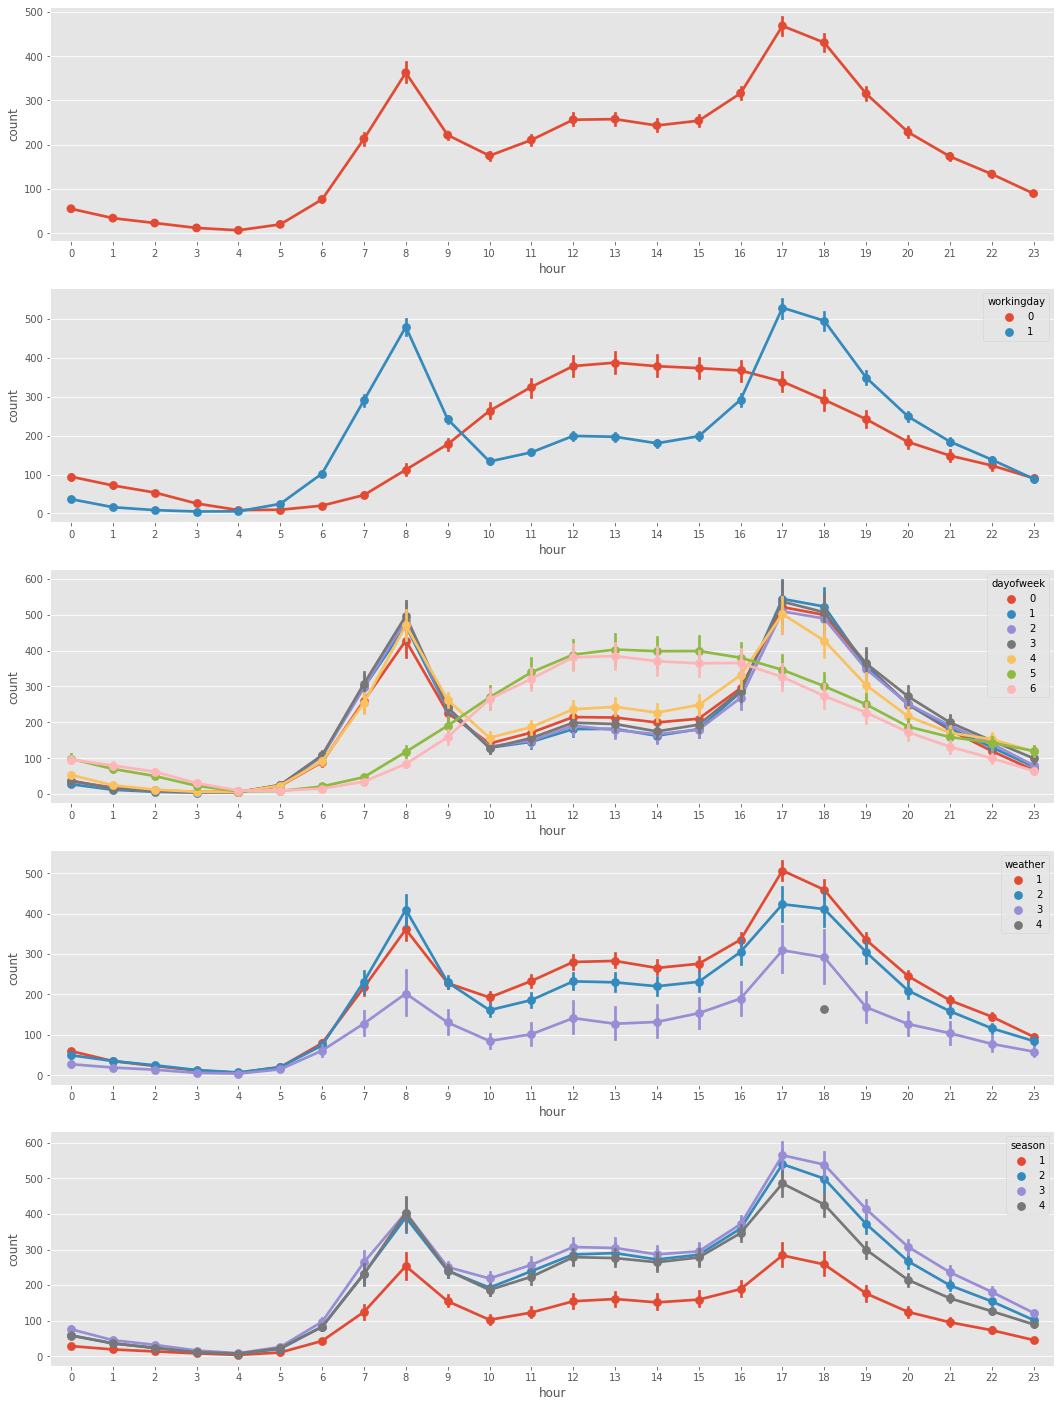

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=train, x='hour', y='count', ax=ax1)
sns.pointplot(data=train, x='hour', y='count', hue='workingday', ax=ax2) #휴일(0)과 구분
sns.pointplot(data=train, x='hour', y='count', hue='dayofweek', ax=ax3) #1월
sns.pointplot(data=train, x='hour', y='count', hue='weather', ax=ax4) #1날씨좋음
sns.pointplot(data=train, x='hour', y='count', hue='season', ax=ax5) #1봄

In [ ]:
#연관관계 히트맵
corrMatt = train[['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count']]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                temp     atemp    casual  ...  humidity  windspeed     count
temp        1.000000  0.984948  0.467097  ... -0.064949  -0.017852  0.394454
atemp       0.984948  1.000000  0.462067  ... -0.043536  -0.057473  0.389784
casual      0.467097  0.462067  1.000000  ... -0.348187   0.092276  0.690414
registered  0.318571  0.314635  0.497250  ... -0.265458   0.091052  0.970948
humidity   -0.064949 -0.043536 -0.348187  ...  1.000000  -0.318607 -0.317371
windspeed  -0.017852 -0.057473  0.092276  ... -0.318607   1.000000  0.101369
count       0.394454  0.389784  0.690414  ... -0.317371   0.101369  1.000000

[7 rows x 7 columns]


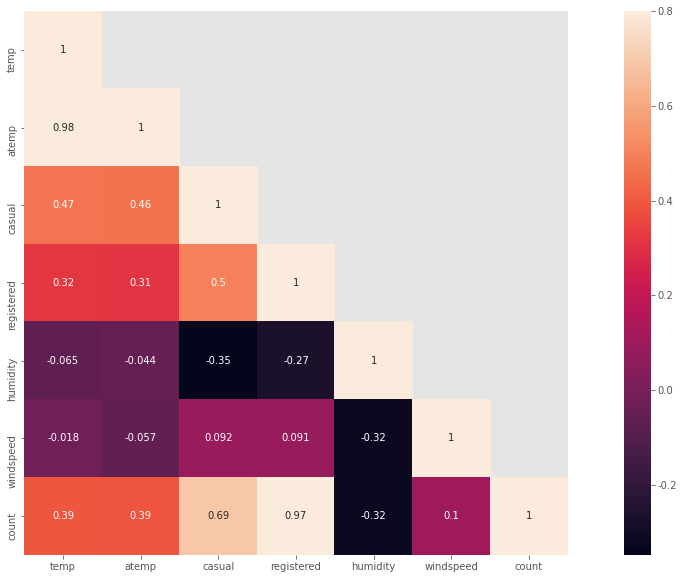

In [ ]:
# 온도와 습도, 풍속은 연관관계가 거의 없다
# 대여량과 가장 연관이 높은 것은 registered 등록된 대여자가 많지만, test데이터에는 이 값이 없다.
# atemp와 temp는 0.98로 상관관계가 높지만 온도와 체감온도로 피처로 사용하기에 적합하지 않을 수 있다.
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)

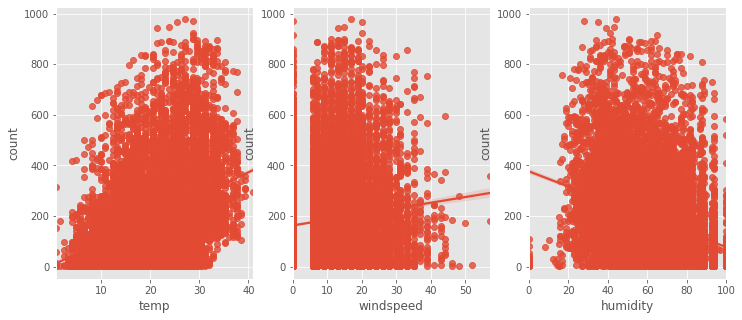

In [ ]:
fig, (ax1,ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12,5)
sns.regplot(x='temp', y='count', data=train, ax=ax1)
sns.regplot(x='windspeed', y='count', data=train, ax=ax2)
sns.regplot(x='humidity', y='count', data=train, ax=ax3)

In [ ]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train['year_month'] = train['datetime'].apply(concatenate_year_month)
train[['datetime', 'year_month']].head()
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,year_month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5,2011-1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5,2011-1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5,2011-1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5,2011-1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5,2011-1


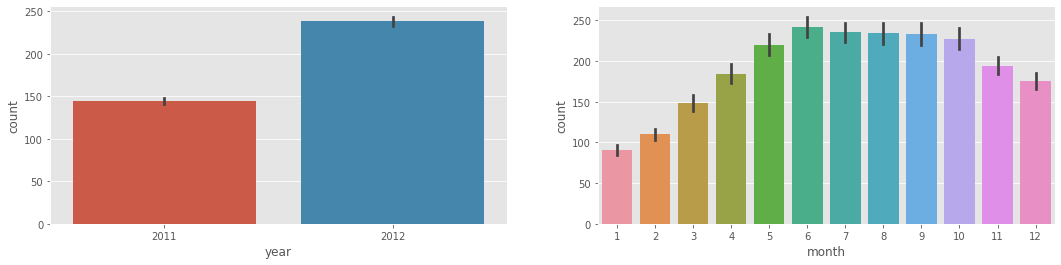

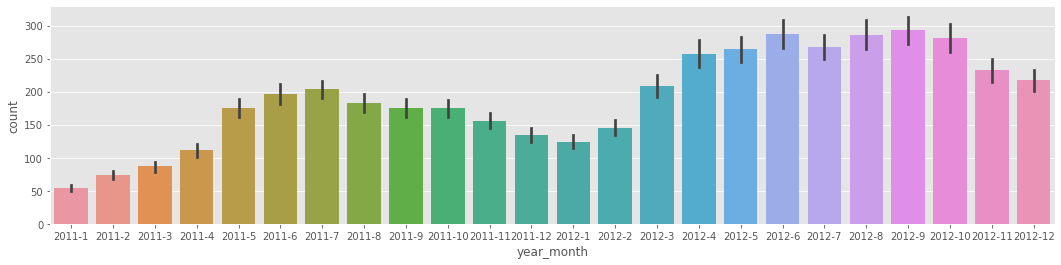

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18,4)

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,4)

sns.barplot(data=train, x='year_month', y='count', ax=ax3)

> ## Outlier 데이터 제거

In [ ]:
# outlier 데이터 제거
trainWithoutOutliers = train[np.abs(train['count'] - train['count'].mean()) <= (3*train['count'])]
print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 20)
(8001, 20)


In [ ]:
test = trainWithoutOutliers = train[np.abs(train['count'] - train['count'].mean()) <= (3*train['count'])]
print(test.shape)

(8001, 20)


In [ ]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
print(test.shape)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


((array([-3.75512118, -3.52683847, -3.40136165, ...,  3.40136165,
          3.52683847,  3.75512118]),
  array([3.8918203 , 3.8918203 , 3.8918203 , ..., 6.87626461, 6.87832647,
         6.88550967])),
 (0.6811413933668111, 5.319241302387579, 0.9926479860119487))

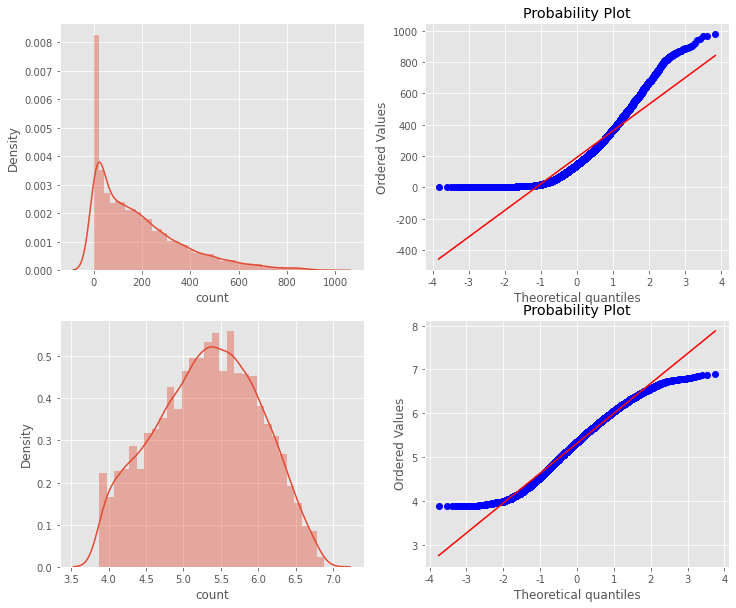

In [ ]:
# count값의 데이터 분포도를 파악

figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12,10)

sns.distplot(  train['count'], ax=axes[0][0])
stats.probplot(train['count'], dist='norm', fit=True, plot=axes[0][1])

sns.distplot  (np.log(  trainWithoutOutliers['count']), ax=axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers['count']), dist='norm', fit=True, plot=axes[1][1])


# 자전거 수요 예측[2/4] 캐글 머신러닝 사이킷런 랜덤포레스트 RMSLE 소개
> https://www.youtube.com/watch?v=95fCw-n5uWM&list=PLaTc2c6yEwmo4hpZKEGi05UFN0tpwHVG1&index=7

## Evaluation
> https://www.kaggle.com/c/bike-sharing-demand/overview/evaluation

In [ ]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    predicted_values = np.array(predicted_values)   # 넘파이로 배열 형태로 바꿔줌
    actual_values = np.array(actual_values)

    log_predict = np.log(predicted_values+1)        # 예측값과 실제값에 1을 더하고 로그
    log_actual  = no.log(actual_values+1)

    difference = log_predict - log_actual
    difference = np.square(difference)

    mean_difference = difference.mean()
    score = np.sqrt(mean_difference)

    return score


### Cross Validation 교차 검증

# 자전거 수요 예측[3/4] 캐글 머신러닝 랜덤포레스트만으로 경진대회에 참여하기
> https://www.youtube.com/watch?v=g7EwIFXJntc&list=PLaTc2c6yEwmo4hpZKEGi05UFN0tpwHVG1&index=8

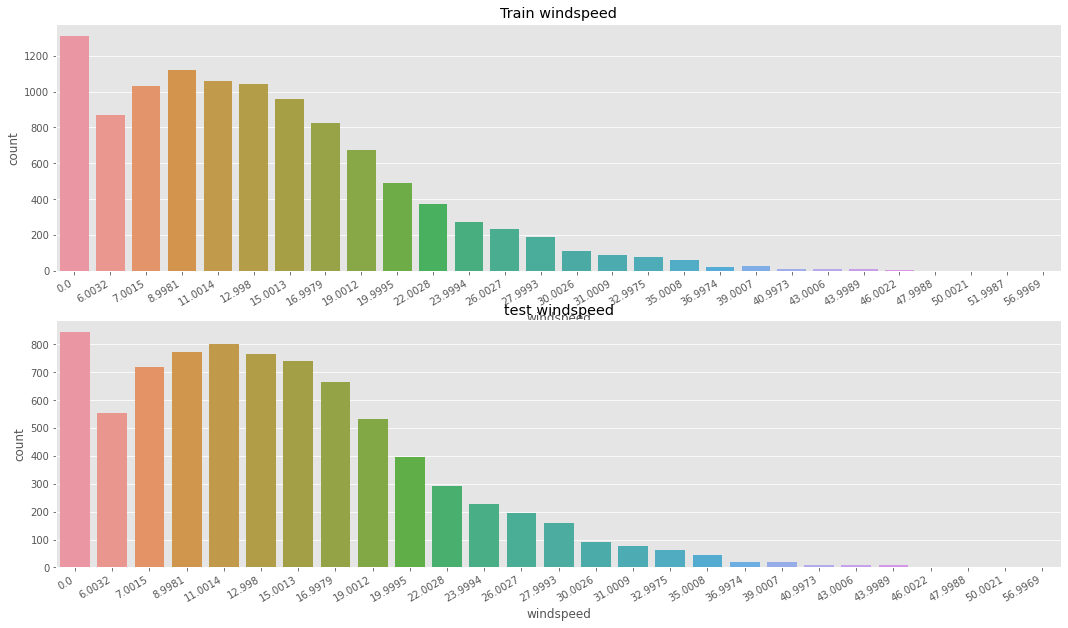

In [ ]:
# windspeed 풍속에 0 값이 가장 많다. 잘못 기록된 데이터를 고쳐 줄 필요가 있음
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18,10)

plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
axes[0].set(ylabel='Count', title='Train windspeed')
sns.countplot(data=train, x='windspeed', ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel='Count', title='test windspeed')
sns.countplot(data=test, x='windspeed', ax=axes[1])

In [ ]:
# 풍속이 0인것과 아닌 것의 세트를 나눔
trainWind0 = train.loc[train['windspeed'] == 0]
trainWindNot0 = train.loc[train['windspeed'] != 0]
print(trainWind0)
print(trainWindNot0)

                 datetime  season  holiday  ...  second  dayofweek  year_month
0     2011-01-01 00:00:00       1        0  ...       0          5      2011-1
1     2011-01-01 01:00:00       1        0  ...       0          5      2011-1
2     2011-01-01 02:00:00       1        0  ...       0          5      2011-1
3     2011-01-01 03:00:00       1        0  ...       0          5      2011-1
4     2011-01-01 04:00:00       1        0  ...       0          5      2011-1
...                   ...     ...      ...  ...     ...        ...         ...
10826 2012-12-17 12:00:00       4        0  ...       0          0     2012-12
10829 2012-12-17 15:00:00       4        0  ...       0          0     2012-12
10846 2012-12-18 08:00:00       4        0  ...       0          1     2012-12
10860 2012-12-18 22:00:00       4        0  ...       0          1     2012-12
10862 2012-12-19 00:00:00       4        0  ...       0          2     2012-12

[1313 rows x 20 columns]
                 datetime 

In [ ]:
# 머신러닝 예측을 통해 풍속값을 대체

from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    dataWind0 =    data.loc[data['windspeed'] ==0]
    dataWindNot0 = data.loc[data['windspeed'] !=0]

    wCol = ['season', 'weather', 'humidity', 'month', 'temp', 'year', 'atemp']

    dataWindNot0['windspeed'] = dataWindNot0['windspeed'].astype('str')

    # 랜덤포레스트 분류기 사용
    rfModel_wind = RandomForestClassifier()

    # wCol에 있는 피처의 값을 바탕으로 풍속을 학습
    rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0['windspeed'])

    # 학습한 값을 바탕으로 풍속이 0으로 기록된 데이터의 풍속을 예측
    wind0Value = rfModel_wind.predict(X=dataWind0[wCol])

    # 값을 예측 후 데이터 프레임 생성
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0
    
    predictWind0['windspeed'] = wind0Value

    data = predictWindNot0.append(predictWind0)
    data['windspeed'] = data['windspeed'].astype('float')
    data.reset_index(inplace=True)
    data.drop('index', inplace=True, axis=1)

    return data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


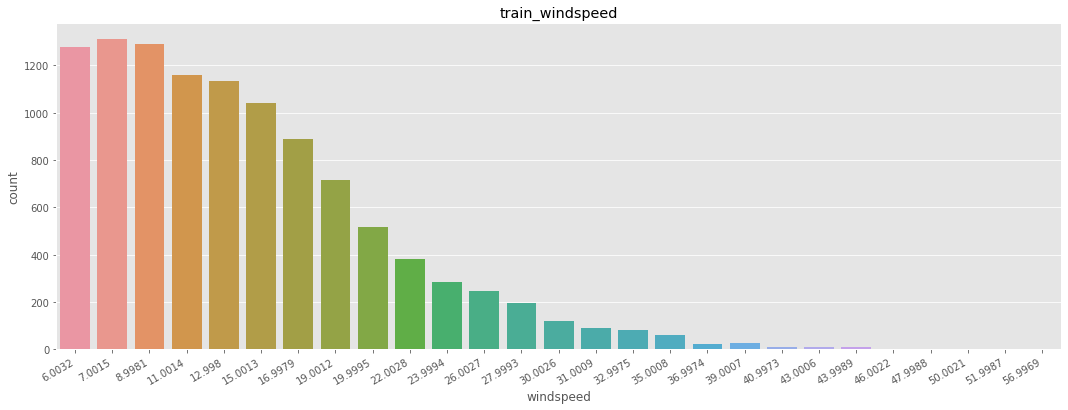

In [ ]:
# 0값을 조정
train = predict_windspeed(train)

fig, ax1 = plt.subplots()
fig.set_size_inches(18, 6)

plt.sca(ax1)
plt.xticks(rotation =30, ha='right')
ax1.set(ylabel='Count', title='train_windspeed')
sns.countplot(data=train, x='windspeed', ax=ax1)